In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from core import *
from utils import *
import pandas as pd

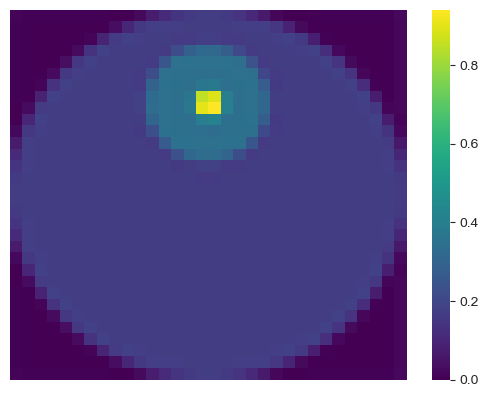

In [2]:
import imageio.v3 as iio
from PIL import Image

im = iio.imread('../data_2/phantom.png')
phantom_img = Image.fromarray(im).resize((32, 32))
phantom_img = np.array(phantom_img.convert('L')) / 255 
# add gaussian noise
# phantom_img = phantom_img + np.random.randn(32, 32) / 25

plot_image(phantom_img)

In [3]:
import json

with open('../data_2/details.json') as file:
    params = json.load(file)
    
params

{'no_of_detectors': 32,
 'source_to_object': 20,
 'source_to_detector': 42,
 'size_of_object': 12,
 'no_of_rotations': 32,
 'fan_beam_angle': 14.67,
 'resolution': 32}

In [4]:
# Theta calculation. MAX CHANCES OF ERROR (unclear info) 
theta_fan = 2 * params['fan_beam_angle']
del params['fan_beam_angle']
params['angle_bw_detectors'] = theta_fan * np.pi / 180 / 31

In [5]:
data = pd.read_csv('../data_2/sinogram.csv', header=None)

In [6]:
d = np.flip(data.to_numpy(), axis=0).flatten()
d.shape

(1024,)

In [7]:
recon = Reconstruction(**params)

Performing decomposition:  92%|█████████▏| 941/1024 [02:09<00:11,  7.24it/s]


Matrix has shape = (1024, 1024)
Matrix has Rank = 941


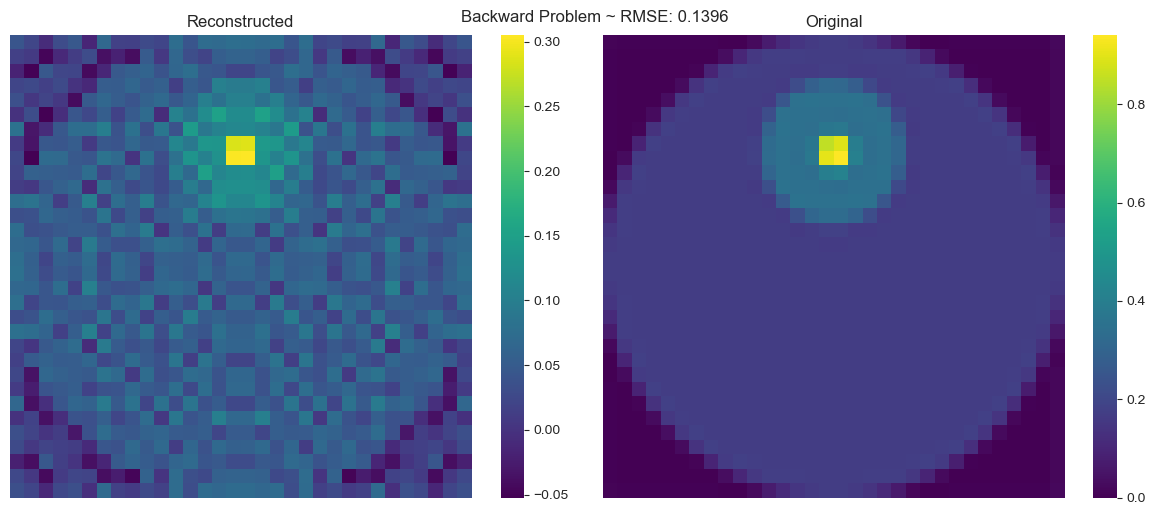

In [8]:
x_img = recon.solve(d)
# plt.imshow(x_img)

plot_images(x_img, phantom_img, title='Backward Problem ~ ')

## Direct Multiplication Method

In [9]:
x = phantom_img.flatten()
d_recon = recon.A @ x

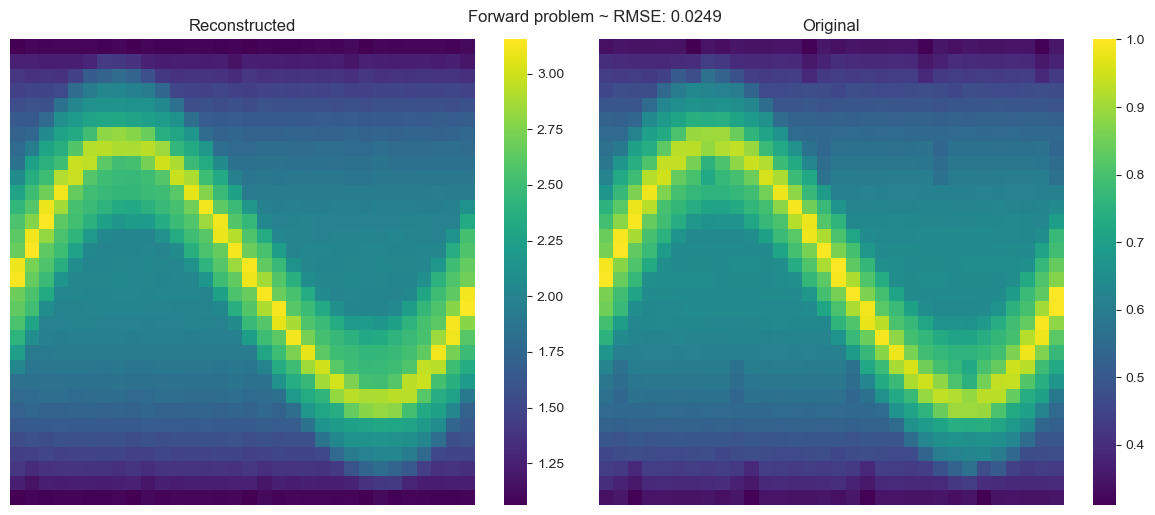

In [10]:
plot_images(d_recon.reshape(32, 32), d.reshape(32, 32), title='Forward problem ~ ');

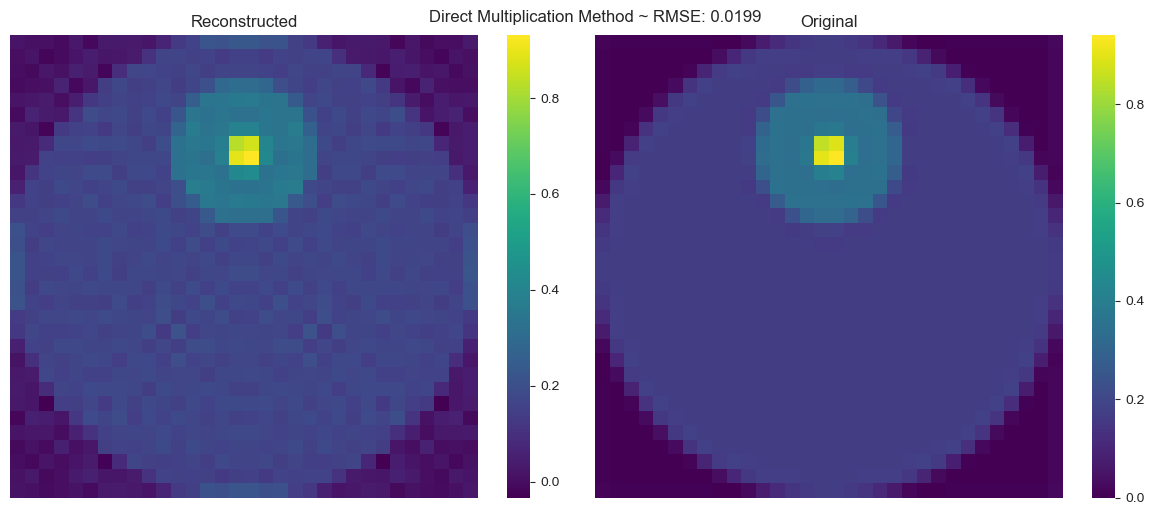

In [11]:
x_recon_img = recon.solve(d_recon)
plot_images(x_recon_img, phantom_img, rescale_for_rmse=False, title='Direct Multiplication Method ~ ');